In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:

    def __init__(self, K, max_iters, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # the centers (mean vector) for each cluster
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

       x1      x2
0  24.412  32.932
1  35.190  12.189
2  26.288  41.718
3   0.376  15.506
4  26.116   3.963
Dataset shape: (60, 2)


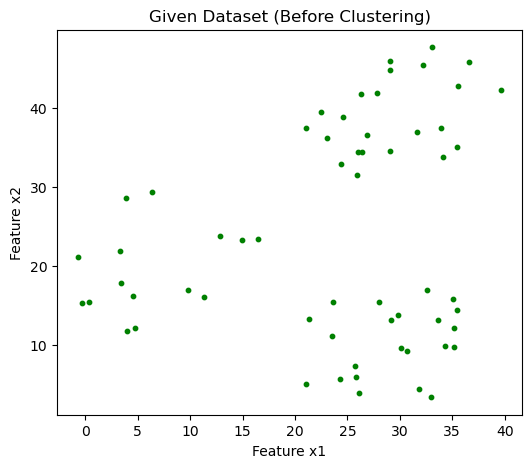

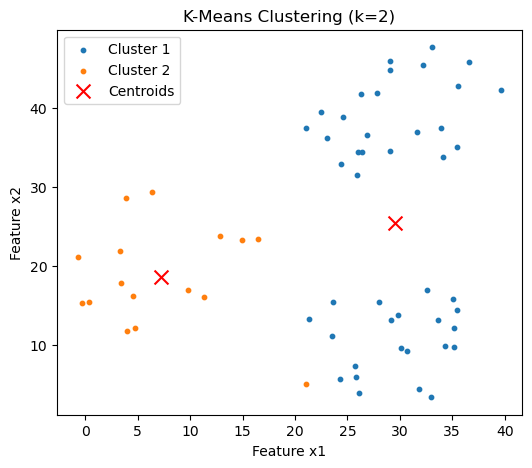

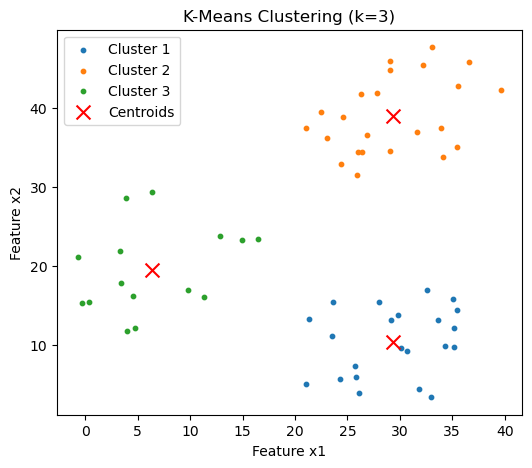

In [3]:

if __name__ == "__main__":
    
    df = pd.read_csv("kmeans-kmeans_blobs.csv")
    print(df.head())  

    # 🔹 Extract the relevant features (assuming x1 and x2 are the column names)
    X = df[['x1', 'x2']].values  # Convert DataFrame to NumPy array

    print("Dataset shape:", X.shape)  # Print dataset shape

    # 🔹 Choose the number of clusters
    clusters = [2, 3]  # Running for k=2 and k=3

    # 🔹 Visualize the dataset before clustering
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], s=10, color='green')
    plt.xlabel("Feature x1")
    plt.ylabel("Feature x2")
    plt.title("Given Dataset (Before Clustering)")
    plt.show()

    for k_val in clusters:
        # 🔹 Run K-Means clustering
        kmeans = KMeans(K=k_val, max_iters=150, plot_steps=False)
        y_pred = kmeans.predict(X)

        # 🔹 Plot the clustered dataset with labels
        plt.figure(figsize=(6, 5))
        for i in range(k_val):
            plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], s=10, label=f'Cluster {i+1}')
        
        # Plot centroids
        plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=100, label="Centroids")

        plt.xlabel("Feature x1")
        plt.ylabel("Feature x2")
        plt.title(f"K-Means Clustering (k={k_val})")
        plt.legend()
        plt.show()